<a href="https://colab.research.google.com/github/IoannisGeorgiou1/GEORGIOU_TELIKI_ERGASIA/blob/main/GEORGIOU_teliki_ergasia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***INTRO LIBRARIES***

ΤΑ ΔΕΔΟΜΕΝΑ ΜΑΣ ΑΦΟΡΟΥΝ ΑΠΟ 6/6 ΕΩΣ 9/7 ΔΗΛΑΔΗ ΤΗΝ ΑΝΕΡΓΙΑ ΤΟΝ ΤΕΛΕΥΤΑΙΟ ΜΗΝΑ ΚΑΙ ΕΙΝΑΙ ΜΕΧΡΙ 5000 ΣΤΗΛΕΣ ΟΠΟΤΕ ΟΙ ΗΜΕΡΟΜΗΝΙΕΣ ΠΕΡΙΟΡΙΣΤΗΚΑΝ

In [3]:
#!python -m spacy download el_core_news_sm

In [4]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime


# εάν έχουμε ελληνικά κείμενα
import spacy

In [6]:
# φτιάχνω κατευθείαν και το nlp για να το έχω έτοιμο για τα wordclouds μου και όποια ανάλυση κειμένου θέλω να κάνω
nlp = spacy.load('el_core_news_sm')

In [7]:
#φερνω το drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#διαβασε το αρχειο exclel
anergiadf = pd.read_excel('/content/drive/MyDrive/ΑΝΕΡΓΙΑ.xlsx')

# ***READ MY DF***

In [9]:
anergiadf

,type,source,title,text,categories,sentiment,date,link
0,web,alithia.gr,Ο Νότης Μηταράκης για τις εκλογές Γαλλίας: Πρέ...,Στην τηλεοπτική εκπομπή «Restart» στο Attica T...,ΑΝΕΡΓΙΑ,Neutral,2024-07-09,https://www.alithia.gr/politiki/o-notis-mitara...
1,web,hellasjournal.com,Αμυράς για επαφές Μητσοτάκη σε Ουάσιγκτον: Δεν...,Στην παρουσία του πρωθυπουργού στη Σύνοδο Κορυ...,ΑΝΕΡΓΙΑ,Positive,2024-07-09,https://hellasjournal.com/2024/07/amiras-gia-e...
2,web,grtimes.gr,45°C\nΑμυράς: Δεν έχει κανονιστεί συνάντηση Μη...,Ο Γενικός Διευθυντής Τύπου και Ενημέρωσης του ...,ΑΝΕΡΓΙΑ,Positive,2024-07-09,https://www.grtimes.gr/politiki/amyras-den-ech...
3,web,oknews.gr,Π. Αμυράς για Σύνοδο ΝΑΤΟ: Δεν έχει κανονιστεί...,Στην παρουσία του πρωθυπουργού στη Σύνοδο Κορυ...,ΑΝΕΡΓΙΑ,Positive,2024-07-09,https://oknews.gr/politiki/p-amyras-gia-synodo...
4,web,olafaq.gr,Πολιτισμός\n5 επιλογές από το ERTflix για τον ...,Μπορεί το EURO να έχει την μερίδα του λέοντος ...,ΑΝΕΡΓΙΑ,Neutral,2024-07-09,https://olafaq.gr/culture/tv/5-epiloges-apo-to...
...,...,...,...,...,...,...,...,...
4995,web,kathimerini.gr,Ο επίμονος πληθωρισμός ανησυχεί τη Fed,Τα προβλήματα των ΗΠΑ μπορούν να φθάσουν έως τ...,ΑΝΕΡΓΙΑ,Neutral,2024-06-06,https://www.kathimerini.gr/economy/563062639/o...
4996,web,vimaonline.gr,Εκδήλωση για την υποψηφιότητα Μπελέρη και Μελέ...,Εκδήλωση για τις υποψηφιότητες του\nΦρέντι\nΜπ...,ΑΝΕΡΓΙΑ,Positive,2024-06-06,https://www.vimaonline.gr/20/article/52784/ekd...
4997,web,tovima.gr,Δημοσκόπηση: «Τρομάζει» η γκρίζα ζώνη τρεις ημ...,Βασίλης Σφήνας\n06.06.2024\n12:02\nΠολιτική\nΒ...,ΑΝΕΡΓΙΑ,Positive,2024-06-06,https://www.tovima.gr/2024/06/06/politics/dimo...
4998,web,eviaportal.gr,Βαγγέλης Αποστόλου: Πρόληψη και ετοιμότητα τα ...,"Οι αγροτοδασικές πυρκαγιές στη χώρα μας, αλλά ...",ΑΝΕΡΓΙΑ,Positive,2024-06-06,https://eviaportal.gr/vangelis-apostolou-proli...


In [12]:
# διαγραφή των rows με τιμή nan σε οποιοδήποτε column
anergiadf .dropna(inplace=True)
anergiadf['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ", regex=True) #αφαίρεση url από στήλη text
# reset_index για να ξαναγίνει συνεχής η αρίθμηση του index του dataframe
anergiadf  = anergiadf.reset_index(drop=True)
anergiadf = anergiadf.drop_duplicates()


In [13]:
anergiadf # βλεπω παλι ποσα rows, columns

,type,source,title,text,categories,sentiment,date,link
0,web,alithia.gr,Ο Νότης Μηταράκης για τις εκλογές Γαλλίας: Πρέ...,Στην τηλεοπτική εκπομπή «Restart» στο Attica T...,ΑΝΕΡΓΙΑ,Neutral,2024-07-09,https://www.alithia.gr/politiki/o-notis-mitara...
1,web,hellasjournal.com,Αμυράς για επαφές Μητσοτάκη σε Ουάσιγκτον: Δεν...,Στην παρουσία του πρωθυπουργού στη Σύνοδο Κορυ...,ΑΝΕΡΓΙΑ,Positive,2024-07-09,https://hellasjournal.com/2024/07/amiras-gia-e...
2,web,grtimes.gr,45°C\nΑμυράς: Δεν έχει κανονιστεί συνάντηση Μη...,Ο Γενικός Διευθυντής Τύπου και Ενημέρωσης του ...,ΑΝΕΡΓΙΑ,Positive,2024-07-09,https://www.grtimes.gr/politiki/amyras-den-ech...
3,web,oknews.gr,Π. Αμυράς για Σύνοδο ΝΑΤΟ: Δεν έχει κανονιστεί...,Στην παρουσία του πρωθυπουργού στη Σύνοδο Κορυ...,ΑΝΕΡΓΙΑ,Positive,2024-07-09,https://oknews.gr/politiki/p-amyras-gia-synodo...
4,web,olafaq.gr,Πολιτισμός\n5 επιλογές από το ERTflix για τον ...,Μπορεί το EURO να έχει την μερίδα του λέοντος ...,ΑΝΕΡΓΙΑ,Neutral,2024-07-09,https://olafaq.gr/culture/tv/5-epiloges-apo-to...
...,...,...,...,...,...,...,...,...
4959,web,euro2day.gr,"Στο 12,1% αυξήθηκε η ανεργία το πρώτο τρίμηνο","Ο αριθμός των ανέργων ανήλθε σε 574.130 άτομα,...",ΑΝΕΡΓΙΑ,Positive,2024-06-06,https://www.euro2day.gr/news/economy/article/2...
4960,web,kathimerini.gr,Ο επίμονος πληθωρισμός ανησυχεί τη Fed,Τα προβλήματα των ΗΠΑ μπορούν να φθάσουν έως τ...,ΑΝΕΡΓΙΑ,Neutral,2024-06-06,https://www.kathimerini.gr/economy/563062639/o...
4961,web,vimaonline.gr,Εκδήλωση για την υποψηφιότητα Μπελέρη και Μελέ...,Εκδήλωση για τις υποψηφιότητες του\nΦρέντι\nΜπ...,ΑΝΕΡΓΙΑ,Positive,2024-06-06,https://www.vimaonline.gr/20/article/52784/ekd...
4962,web,tovima.gr,Δημοσκόπηση: «Τρομάζει» η γκρίζα ζώνη τρεις ημ...,Βασίλης Σφήνας\n06.06.2024\n12:02\nΠολιτική\nΒ...,ΑΝΕΡΓΙΑ,Positive,2024-06-06,https://www.tovima.gr/2024/06/06/politics/dimo...


# ***DF OVERVIEW***

In [14]:
anergiadf.head() # FIRST 5 ROWS

,type,source,title,text,categories,sentiment,date,link
0,web,alithia.gr,Ο Νότης Μηταράκης για τις εκλογές Γαλλίας: Πρέ...,Στην τηλεοπτική εκπομπή «Restart» στο Attica T...,ΑΝΕΡΓΙΑ,Neutral,2024-07-09,https://www.alithia.gr/politiki/o-notis-mitara...
1,web,hellasjournal.com,Αμυράς για επαφές Μητσοτάκη σε Ουάσιγκτον: Δεν...,Στην παρουσία του πρωθυπουργού στη Σύνοδο Κορυ...,ΑΝΕΡΓΙΑ,Positive,2024-07-09,https://hellasjournal.com/2024/07/amiras-gia-e...
2,web,grtimes.gr,45°C\nΑμυράς: Δεν έχει κανονιστεί συνάντηση Μη...,Ο Γενικός Διευθυντής Τύπου και Ενημέρωσης του ...,ΑΝΕΡΓΙΑ,Positive,2024-07-09,https://www.grtimes.gr/politiki/amyras-den-ech...
3,web,oknews.gr,Π. Αμυράς για Σύνοδο ΝΑΤΟ: Δεν έχει κανονιστεί...,Στην παρουσία του πρωθυπουργού στη Σύνοδο Κορυ...,ΑΝΕΡΓΙΑ,Positive,2024-07-09,https://oknews.gr/politiki/p-amyras-gia-synodo...
4,web,olafaq.gr,Πολιτισμός\n5 επιλογές από το ERTflix για τον ...,Μπορεί το EURO να έχει την μερίδα του λέοντος ...,ΑΝΕΡΓΙΑ,Neutral,2024-07-09,https://olafaq.gr/culture/tv/5-epiloges-apo-to...


In [15]:
anergiadf.tail() #LAST 5 ROWS

,type,source,title,text,categories,sentiment,date,link
4959,web,euro2day.gr,"Στο 12,1% αυξήθηκε η ανεργία το πρώτο τρίμηνο","Ο αριθμός των ανέργων ανήλθε σε 574.130 άτομα,...",ΑΝΕΡΓΙΑ,Positive,2024-06-06,https://www.euro2day.gr/news/economy/article/2...
4960,web,kathimerini.gr,Ο επίμονος πληθωρισμός ανησυχεί τη Fed,Τα προβλήματα των ΗΠΑ μπορούν να φθάσουν έως τ...,ΑΝΕΡΓΙΑ,Neutral,2024-06-06,https://www.kathimerini.gr/economy/563062639/o...
4961,web,vimaonline.gr,Εκδήλωση για την υποψηφιότητα Μπελέρη και Μελέ...,Εκδήλωση για τις υποψηφιότητες του\nΦρέντι\nΜπ...,ΑΝΕΡΓΙΑ,Positive,2024-06-06,https://www.vimaonline.gr/20/article/52784/ekd...
4962,web,tovima.gr,Δημοσκόπηση: «Τρομάζει» η γκρίζα ζώνη τρεις ημ...,Βασίλης Σφήνας\n06.06.2024\n12:02\nΠολιτική\nΒ...,ΑΝΕΡΓΙΑ,Positive,2024-06-06,https://www.tovima.gr/2024/06/06/politics/dimo...
4963,web,eviaportal.gr,Βαγγέλης Αποστόλου: Πρόληψη και ετοιμότητα τα ...,"Οι αγροτοδασικές πυρκαγιές στη χώρα μας, αλλά ...",ΑΝΕΡΓΙΑ,Positive,2024-06-06,https://eviaportal.gr/vangelis-apostolou-proli...


In [16]:
anergiadf.columns #COLUMNS OF DF

Index(['type', 'source', 'title', 'text', 'categories', 'sentiment', 'date',
       'link'],
      dtype='object')

In [17]:
anergiadf.shape # ROWS AND COLUMNS

(4964, 8)

In [18]:
anergiadf.describe()

,type,source,title,text,categories,sentiment,date,link
count,4964,4964,4964,4964,4964,4964,4964,4964
unique,2,713,3291,4579,1,3,34,4964
top,web,ot.gr,Κυριάκος Μητσοτάκης: Η ανάταξη του ΕΣΥ αποτελε...,"Στο 10,6% διαμορφώθηκε το ποσοστό της ανεργίας...",ΑΝΕΡΓΙΑ,Positive,2024-06-07,https://www.alithia.gr/politiki/o-notis-mitara...
freq,4961,67,35,14,4964,2685,449,1


# ***DATETIME***

In [19]:
anergiadf['datetime'] = pd.to_datetime(anergiadf['date'], format='%Y-%m-%d')

In [20]:
anergiadf

,type,source,title,text,categories,sentiment,date,link,datetime
0,web,alithia.gr,Ο Νότης Μηταράκης για τις εκλογές Γαλλίας: Πρέ...,Στην τηλεοπτική εκπομπή «Restart» στο Attica T...,ΑΝΕΡΓΙΑ,Neutral,2024-07-09,https://www.alithia.gr/politiki/o-notis-mitara...,2024-07-09
1,web,hellasjournal.com,Αμυράς για επαφές Μητσοτάκη σε Ουάσιγκτον: Δεν...,Στην παρουσία του πρωθυπουργού στη Σύνοδο Κορυ...,ΑΝΕΡΓΙΑ,Positive,2024-07-09,https://hellasjournal.com/2024/07/amiras-gia-e...,2024-07-09
2,web,grtimes.gr,45°C\nΑμυράς: Δεν έχει κανονιστεί συνάντηση Μη...,Ο Γενικός Διευθυντής Τύπου και Ενημέρωσης του ...,ΑΝΕΡΓΙΑ,Positive,2024-07-09,https://www.grtimes.gr/politiki/amyras-den-ech...,2024-07-09
3,web,oknews.gr,Π. Αμυράς για Σύνοδο ΝΑΤΟ: Δεν έχει κανονιστεί...,Στην παρουσία του πρωθυπουργού στη Σύνοδο Κορυ...,ΑΝΕΡΓΙΑ,Positive,2024-07-09,https://oknews.gr/politiki/p-amyras-gia-synodo...,2024-07-09
4,web,olafaq.gr,Πολιτισμός\n5 επιλογές από το ERTflix για τον ...,Μπορεί το EURO να έχει την μερίδα του λέοντος ...,ΑΝΕΡΓΙΑ,Neutral,2024-07-09,https://olafaq.gr/culture/tv/5-epiloges-apo-to...,2024-07-09
...,...,...,...,...,...,...,...,...,...
4959,web,euro2day.gr,"Στο 12,1% αυξήθηκε η ανεργία το πρώτο τρίμηνο","Ο αριθμός των ανέργων ανήλθε σε 574.130 άτομα,...",ΑΝΕΡΓΙΑ,Positive,2024-06-06,https://www.euro2day.gr/news/economy/article/2...,2024-06-06
4960,web,kathimerini.gr,Ο επίμονος πληθωρισμός ανησυχεί τη Fed,Τα προβλήματα των ΗΠΑ μπορούν να φθάσουν έως τ...,ΑΝΕΡΓΙΑ,Neutral,2024-06-06,https://www.kathimerini.gr/economy/563062639/o...,2024-06-06
4961,web,vimaonline.gr,Εκδήλωση για την υποψηφιότητα Μπελέρη και Μελέ...,Εκδήλωση για τις υποψηφιότητες του\nΦρέντι\nΜπ...,ΑΝΕΡΓΙΑ,Positive,2024-06-06,https://www.vimaonline.gr/20/article/52784/ekd...,2024-06-06
4962,web,tovima.gr,Δημοσκόπηση: «Τρομάζει» η γκρίζα ζώνη τρεις ημ...,Βασίλης Σφήνας\n06.06.2024\n12:02\nΠολιτική\nΒ...,ΑΝΕΡΓΙΑ,Positive,2024-06-06,https://www.tovima.gr/2024/06/06/politics/dimo...,2024-06-06


In [21]:
#Αφού μετατρέψουμε τις ημερομηνίες σε datetime, τώρα μπορούμε να φτιάξουμε στήλες με τα έτη, τους μήνες, τις μέρες κλπ

anergiadf['year'] = pd.DatetimeIndex(anergiadf['datetime']).year
anergiadf['month'] = pd.DatetimeIndex(anergiadf['datetime']).month
anergiadf['day'] = pd.DatetimeIndex(anergiadf['datetime']).day


In [22]:
anergiadf

,type,source,title,text,categories,sentiment,date,link,datetime,year,month,day
0,web,alithia.gr,Ο Νότης Μηταράκης για τις εκλογές Γαλλίας: Πρέ...,Στην τηλεοπτική εκπομπή «Restart» στο Attica T...,ΑΝΕΡΓΙΑ,Neutral,2024-07-09,https://www.alithia.gr/politiki/o-notis-mitara...,2024-07-09,2024,7,9
1,web,hellasjournal.com,Αμυράς για επαφές Μητσοτάκη σε Ουάσιγκτον: Δεν...,Στην παρουσία του πρωθυπουργού στη Σύνοδο Κορυ...,ΑΝΕΡΓΙΑ,Positive,2024-07-09,https://hellasjournal.com/2024/07/amiras-gia-e...,2024-07-09,2024,7,9
2,web,grtimes.gr,45°C\nΑμυράς: Δεν έχει κανονιστεί συνάντηση Μη...,Ο Γενικός Διευθυντής Τύπου και Ενημέρωσης του ...,ΑΝΕΡΓΙΑ,Positive,2024-07-09,https://www.grtimes.gr/politiki/amyras-den-ech...,2024-07-09,2024,7,9
3,web,oknews.gr,Π. Αμυράς για Σύνοδο ΝΑΤΟ: Δεν έχει κανονιστεί...,Στην παρουσία του πρωθυπουργού στη Σύνοδο Κορυ...,ΑΝΕΡΓΙΑ,Positive,2024-07-09,https://oknews.gr/politiki/p-amyras-gia-synodo...,2024-07-09,2024,7,9
4,web,olafaq.gr,Πολιτισμός\n5 επιλογές από το ERTflix για τον ...,Μπορεί το EURO να έχει την μερίδα του λέοντος ...,ΑΝΕΡΓΙΑ,Neutral,2024-07-09,https://olafaq.gr/culture/tv/5-epiloges-apo-to...,2024-07-09,2024,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...
4959,web,euro2day.gr,"Στο 12,1% αυξήθηκε η ανεργία το πρώτο τρίμηνο","Ο αριθμός των ανέργων ανήλθε σε 574.130 άτομα,...",ΑΝΕΡΓΙΑ,Positive,2024-06-06,https://www.euro2day.gr/news/economy/article/2...,2024-06-06,2024,6,6
4960,web,kathimerini.gr,Ο επίμονος πληθωρισμός ανησυχεί τη Fed,Τα προβλήματα των ΗΠΑ μπορούν να φθάσουν έως τ...,ΑΝΕΡΓΙΑ,Neutral,2024-06-06,https://www.kathimerini.gr/economy/563062639/o...,2024-06-06,2024,6,6
4961,web,vimaonline.gr,Εκδήλωση για την υποψηφιότητα Μπελέρη και Μελέ...,Εκδήλωση για τις υποψηφιότητες του\nΦρέντι\nΜπ...,ΑΝΕΡΓΙΑ,Positive,2024-06-06,https://www.vimaonline.gr/20/article/52784/ekd...,2024-06-06,2024,6,6
4962,web,tovima.gr,Δημοσκόπηση: «Τρομάζει» η γκρίζα ζώνη τρεις ημ...,Βασίλης Σφήνας\n06.06.2024\n12:02\nΠολιτική\nΒ...,ΑΝΕΡΓΙΑ,Positive,2024-06-06,https://www.tovima.gr/2024/06/06/politics/dimo...,2024-06-06,2024,6,6


# ***ΔΗΜΙΟΥΡΓΙΑ ΣΤΑΤΙΣΤΙΚΩΝ ΚΑΙ ΓΡΑΦΗΜΑΤΩΝ***

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
article_counts_per_day = anergiadf['datetime'].dt.date.value_counts().sort_index()
 #το πλήθος των άρθρων ανά μέρα


In [25]:
percentages_per_day = article_counts_per_day / article_counts_per_day.sum() * 100 ##το ποσοστό των άρθρων ανά μέρα

In [26]:
percentages_per_day

datetime
2024-06-06    4.371475
2024-06-07    9.045125
2024-06-08    1.954069
2024-06-09    1.510878
2024-06-10    1.329573
2024-06-11    1.430298
2024-06-12    5.479452
2024-06-13    3.787268
2024-06-14    1.813054
2024-06-15    4.049154
2024-06-16    0.684932
2024-06-17    2.034649
2024-06-18    3.021757
2024-06-19    6.950040
2024-06-20    4.391620
2024-06-21    2.115230
2024-06-22    3.424658
2024-06-23    2.921031
2024-06-24    1.188558
2024-06-25    2.659146
2024-06-26    4.029009
2024-06-27    2.356970
2024-06-28    4.270749
2024-06-29    0.825947
2024-06-30    0.846092
2024-07-01    4.371475
2024-07-02    2.820306
2024-07-03    1.712329
2024-07-04    1.551168
2024-07-05    3.746978
2024-07-06    1.309428
2024-07-07    5.257857
2024-07-08    2.175665
2024-07-09    0.564061
Name: count, dtype: float64

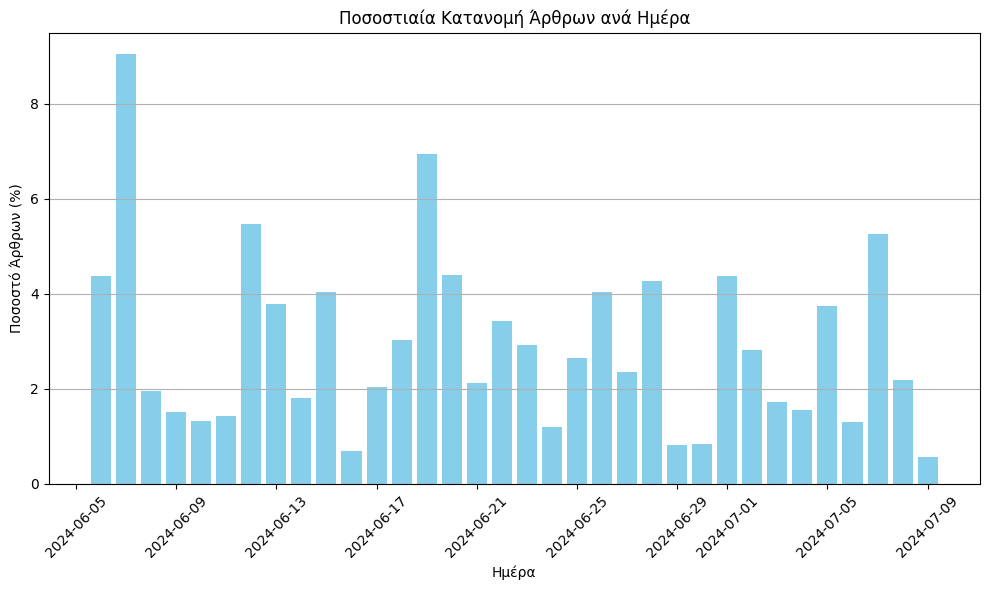

In [27]:
plt.figure(figsize=(10, 6))  # Αυξήσαμε το μέγεθος για καλύτερη εμφάνιση
plt.bar(percentages_per_day.index, percentages_per_day.values, color='skyblue')
plt.title('Ποσοστιαία Κατανομή Άρθρων ανά Ημέρα')
plt.xlabel('Ημέρα')
plt.ylabel('Ποσοστό Άρθρων (%)')
plt.xticks(rotation=45)  # Περιστροφή των ετικετών στον άξονα x για καλύτερη αναγνωσιμότητα
plt.grid(axis='y')  # Προσθήκη πλέγματος για τον άξονα y
plt.tight_layout()  # Προσαρμογή του γραφήματος για να μην κοπούν τα κείμενα
plt.show()

In [28]:
top_sources = anergiadf['source'].value_counts().head(5) #τοπ 5 πηγες αρθρων


In [29]:
top_sources

source
ot.gr             67
capital.gr        61
rizospastis.gr    52
newmoney.gr       48
protothema.gr     47
Name: count, dtype: int64

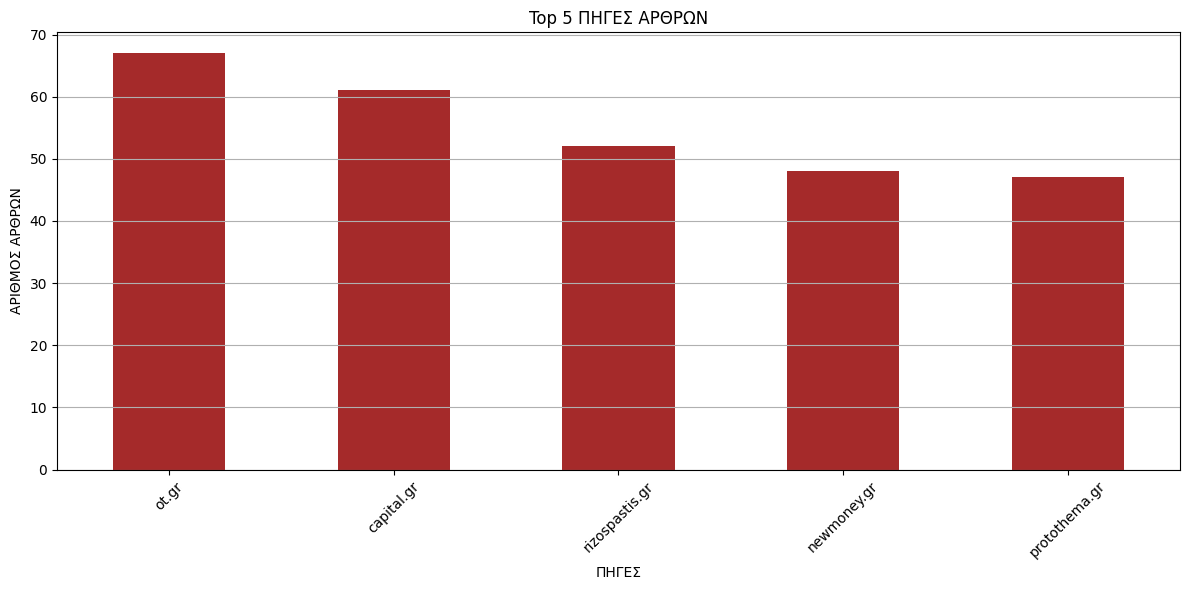

In [30]:
plt.figure(figsize=(12, 6))
top_sources.plot(kind='bar', color='brown')
plt.title('Top 5 ΠΗΓΕΣ ΑΡΘΡΩΝ')
plt.xlabel('ΠΗΓΕΣ')
plt.ylabel('ΑΡΙΘΜΟΣ ΑΡΘΡΩΝ')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [31]:
articles_per_day = anergiadf.groupby(anergiadf['date']).size() # μέσος όρος άρθρων ανά ημέρα

In [32]:
average_articles_per_day = articles_per_day.mean()

In [33]:
print("Ο μέσος όρος του πλήθους των άρθρων ανά ημέρα είναι:", average_articles_per_day)

Ο μέσος όρος του πλήθους των άρθρων ανά ημέρα είναι: 146.0


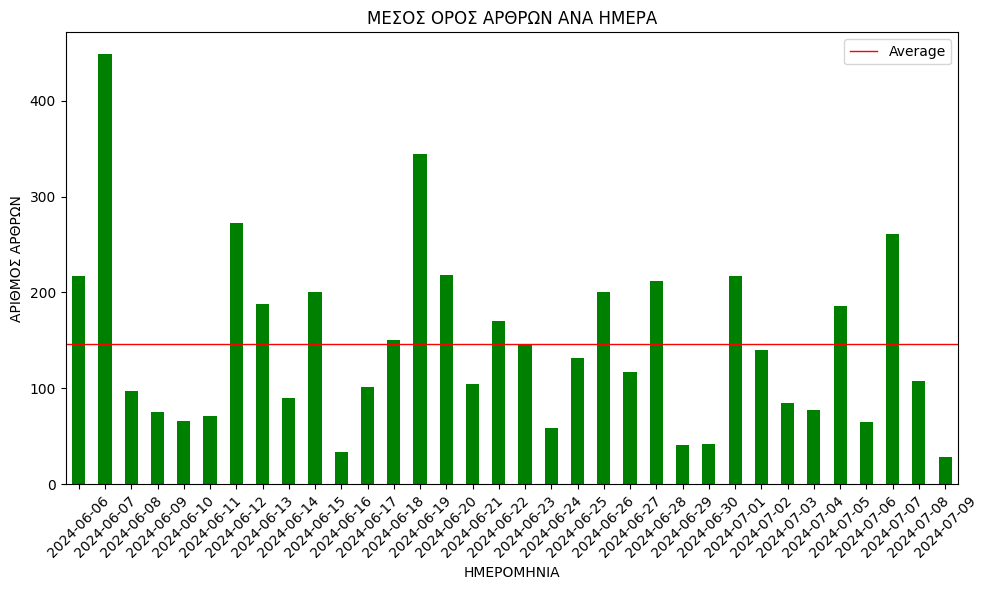

In [34]:
plt.figure(figsize=(10, 6))
articles_per_day.plot(kind='bar', color='green')
plt.axhline(y=average_articles_per_day, color='r', linestyle='-', linewidth=1, label='Average')
plt.title('ΜΕΣΟΣ ΟΡΟΣ ΑΡΘΡΩΝ ΑΝΑ ΗΜΕΡΑ')
plt.xlabel('ΗΜΕΡΟΜΗΝΙΑ')
plt.ylabel('ΑΡΙΘΜΟΣ ΑΡΘΡΩΝ')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# ***ΔΗΜΙΟΥΡΓΙΑ WORDCLOUD***

In [35]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime


# εάν έχουμε ελληνικά κείμενα
import spacy

In [36]:
 # φτιάχνω κατευθείαν και το nlp για να το έχω έτοιμο για τα wordclouds μου και όποια ανάλυση κειμένου θέλω να κάνω
nlp = spacy.load('el_core_news_sm')

In [37]:
anergiadf['text'] = anergiadf[['title', 'text']].agg(' '.join, axis=1)

In [38]:
anergiadf['text'] = anergiadf[['title', 'text']].agg('. '.join, axis=1)
anergiadf.loc[16, 'text']

'Μισθοί: Έρχονται οκτώ ανατροπές σε εργασία και ασφάλιση στο δεύτερο εξάμηνο. Μισθοί: Έρχονται οκτώ ανατροπές σε εργασία και ασφάλιση στο δεύτερο εξάμηνο Από\nΓιώργος Αλβέρτης\n-\nΟι μισθοί, η ανεργία, το νέο επίδομα ανεργίας, οι αλλαγές στις εισφορές και οι συλλογικές συμβάσεις εργασίας στις προτεραιότητες του υπουργείου Εργασίας\nOι μισθοί και οι συλλογικές συμβάσεις εργασίας, η μείωση των ασφαλιστικών εισφορών και το νέο επίδομα ανεργίας είναι μεταξύ άλλων στις οκτώ ανατροπές που ετοιμάζει να φέρει σε εργασία και ασφάλιση το υπουργείο Εργασίας για το δεύτερο εξάμηνο του έτους.\nΤαυτόχρονα θα επιδιωχθεί η επίτευξη κοινωνικής συμφωνίας με τους κοινωνικούς εταίρους για την ρύθμιση θεμάτων που τους απασχολούν.\nΟι προτεραιότητες και τα θέματα \xa0άμεσης αντιμετώπισης προσδιορίσθηκαν κατά την πρόσφατη επίσκεψη του πρωθυπουργού\xa0 κ. Κ. Μητσοτάκη στο υπουργείο Εργασίας, όπου επιχειρήθηκε να τονισθεί το φιλολαϊκό προφίλ της κυβερνητικής πολιτικής.\nΑκολούθησαν δύο συναντήσεις της υπουργού

In [39]:
# Μετατροπή της στήλης των ημερομηνιών σε datetime
anergiadf['datetime'] = pd.to_datetime(anergiadf['date'], format='%Y-%m-%d')

In [40]:
anergiadf

,type,source,title,text,categories,sentiment,date,link,datetime,year,month,day
0,web,alithia.gr,Ο Νότης Μηταράκης για τις εκλογές Γαλλίας: Πρέ...,Ο Νότης Μηταράκης για τις εκλογές Γαλλίας: Πρέ...,ΑΝΕΡΓΙΑ,Neutral,2024-07-09,https://www.alithia.gr/politiki/o-notis-mitara...,2024-07-09,2024,7,9
1,web,hellasjournal.com,Αμυράς για επαφές Μητσοτάκη σε Ουάσιγκτον: Δεν...,Αμυράς για επαφές Μητσοτάκη σε Ουάσιγκτον: Δεν...,ΑΝΕΡΓΙΑ,Positive,2024-07-09,https://hellasjournal.com/2024/07/amiras-gia-e...,2024-07-09,2024,7,9
2,web,grtimes.gr,45°C\nΑμυράς: Δεν έχει κανονιστεί συνάντηση Μη...,45°C\nΑμυράς: Δεν έχει κανονιστεί συνάντηση Μη...,ΑΝΕΡΓΙΑ,Positive,2024-07-09,https://www.grtimes.gr/politiki/amyras-den-ech...,2024-07-09,2024,7,9
3,web,oknews.gr,Π. Αμυράς για Σύνοδο ΝΑΤΟ: Δεν έχει κανονιστεί...,Π. Αμυράς για Σύνοδο ΝΑΤΟ: Δεν έχει κανονιστεί...,ΑΝΕΡΓΙΑ,Positive,2024-07-09,https://oknews.gr/politiki/p-amyras-gia-synodo...,2024-07-09,2024,7,9
4,web,olafaq.gr,Πολιτισμός\n5 επιλογές από το ERTflix για τον ...,Πολιτισμός\n5 επιλογές από το ERTflix για τον ...,ΑΝΕΡΓΙΑ,Neutral,2024-07-09,https://olafaq.gr/culture/tv/5-epiloges-apo-to...,2024-07-09,2024,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...
4959,web,euro2day.gr,"Στο 12,1% αυξήθηκε η ανεργία το πρώτο τρίμηνο","Στο 12,1% αυξήθηκε η ανεργία το πρώτο τρίμηνο....",ΑΝΕΡΓΙΑ,Positive,2024-06-06,https://www.euro2day.gr/news/economy/article/2...,2024-06-06,2024,6,6
4960,web,kathimerini.gr,Ο επίμονος πληθωρισμός ανησυχεί τη Fed,Ο επίμονος πληθωρισμός ανησυχεί τη Fed. Ο επίμ...,ΑΝΕΡΓΙΑ,Neutral,2024-06-06,https://www.kathimerini.gr/economy/563062639/o...,2024-06-06,2024,6,6
4961,web,vimaonline.gr,Εκδήλωση για την υποψηφιότητα Μπελέρη και Μελέ...,Εκδήλωση για την υποψηφιότητα Μπελέρη και Μελέ...,ΑΝΕΡΓΙΑ,Positive,2024-06-06,https://www.vimaonline.gr/20/article/52784/ekd...,2024-06-06,2024,6,6
4962,web,tovima.gr,Δημοσκόπηση: «Τρομάζει» η γκρίζα ζώνη τρεις ημ...,Δημοσκόπηση: «Τρομάζει» η γκρίζα ζώνη τρεις ημ...,ΑΝΕΡΓΙΑ,Positive,2024-06-06,https://www.tovima.gr/2024/06/06/politics/dimo...,2024-06-06,2024,6,6


In [41]:
anergiadf['year'] = pd.DatetimeIndex(anergiadf['datetime']).year

# στήλη μήνα
anergiadf['month'] = pd.DatetimeIndex(anergiadf['datetime']).month
# κλπ.
anergiadf['day'] = pd.DatetimeIndex(anergiadf['datetime']).day

In [42]:
anergiadf

,type,source,title,text,categories,sentiment,date,link,datetime,year,month,day
0,web,alithia.gr,Ο Νότης Μηταράκης για τις εκλογές Γαλλίας: Πρέ...,Ο Νότης Μηταράκης για τις εκλογές Γαλλίας: Πρέ...,ΑΝΕΡΓΙΑ,Neutral,2024-07-09,https://www.alithia.gr/politiki/o-notis-mitara...,2024-07-09,2024,7,9
1,web,hellasjournal.com,Αμυράς για επαφές Μητσοτάκη σε Ουάσιγκτον: Δεν...,Αμυράς για επαφές Μητσοτάκη σε Ουάσιγκτον: Δεν...,ΑΝΕΡΓΙΑ,Positive,2024-07-09,https://hellasjournal.com/2024/07/amiras-gia-e...,2024-07-09,2024,7,9
2,web,grtimes.gr,45°C\nΑμυράς: Δεν έχει κανονιστεί συνάντηση Μη...,45°C\nΑμυράς: Δεν έχει κανονιστεί συνάντηση Μη...,ΑΝΕΡΓΙΑ,Positive,2024-07-09,https://www.grtimes.gr/politiki/amyras-den-ech...,2024-07-09,2024,7,9
3,web,oknews.gr,Π. Αμυράς για Σύνοδο ΝΑΤΟ: Δεν έχει κανονιστεί...,Π. Αμυράς για Σύνοδο ΝΑΤΟ: Δεν έχει κανονιστεί...,ΑΝΕΡΓΙΑ,Positive,2024-07-09,https://oknews.gr/politiki/p-amyras-gia-synodo...,2024-07-09,2024,7,9
4,web,olafaq.gr,Πολιτισμός\n5 επιλογές από το ERTflix για τον ...,Πολιτισμός\n5 επιλογές από το ERTflix για τον ...,ΑΝΕΡΓΙΑ,Neutral,2024-07-09,https://olafaq.gr/culture/tv/5-epiloges-apo-to...,2024-07-09,2024,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...
4959,web,euro2day.gr,"Στο 12,1% αυξήθηκε η ανεργία το πρώτο τρίμηνο","Στο 12,1% αυξήθηκε η ανεργία το πρώτο τρίμηνο....",ΑΝΕΡΓΙΑ,Positive,2024-06-06,https://www.euro2day.gr/news/economy/article/2...,2024-06-06,2024,6,6
4960,web,kathimerini.gr,Ο επίμονος πληθωρισμός ανησυχεί τη Fed,Ο επίμονος πληθωρισμός ανησυχεί τη Fed. Ο επίμ...,ΑΝΕΡΓΙΑ,Neutral,2024-06-06,https://www.kathimerini.gr/economy/563062639/o...,2024-06-06,2024,6,6
4961,web,vimaonline.gr,Εκδήλωση για την υποψηφιότητα Μπελέρη και Μελέ...,Εκδήλωση για την υποψηφιότητα Μπελέρη και Μελέ...,ΑΝΕΡΓΙΑ,Positive,2024-06-06,https://www.vimaonline.gr/20/article/52784/ekd...,2024-06-06,2024,6,6
4962,web,tovima.gr,Δημοσκόπηση: «Τρομάζει» η γκρίζα ζώνη τρεις ημ...,Δημοσκόπηση: «Τρομάζει» η γκρίζα ζώνη τρεις ημ...,ΑΝΕΡΓΙΑ,Positive,2024-06-06,https://www.tovima.gr/2024/06/06/politics/dimo...,2024-06-06,2024,6,6


In [43]:
 anergiadf[['date', "categories"]].describe()

,date,categories
count,4964,4964
unique,34,1
top,2024-06-07,ΑΝΕΡΓΙΑ
freq,449,4964


In [44]:
anergiadf['datetime'] = pd.to_datetime(anergiadf['date'], format='%Y-%m-%d')
anergiadf['day'] = pd.DatetimeIndex(anergiadf['datetime']).day

In [45]:
anergiadf

,type,source,title,text,categories,sentiment,date,link,datetime,year,month,day
0,web,alithia.gr,Ο Νότης Μηταράκης για τις εκλογές Γαλλίας: Πρέ...,Ο Νότης Μηταράκης για τις εκλογές Γαλλίας: Πρέ...,ΑΝΕΡΓΙΑ,Neutral,2024-07-09,https://www.alithia.gr/politiki/o-notis-mitara...,2024-07-09,2024,7,9
1,web,hellasjournal.com,Αμυράς για επαφές Μητσοτάκη σε Ουάσιγκτον: Δεν...,Αμυράς για επαφές Μητσοτάκη σε Ουάσιγκτον: Δεν...,ΑΝΕΡΓΙΑ,Positive,2024-07-09,https://hellasjournal.com/2024/07/amiras-gia-e...,2024-07-09,2024,7,9
2,web,grtimes.gr,45°C\nΑμυράς: Δεν έχει κανονιστεί συνάντηση Μη...,45°C\nΑμυράς: Δεν έχει κανονιστεί συνάντηση Μη...,ΑΝΕΡΓΙΑ,Positive,2024-07-09,https://www.grtimes.gr/politiki/amyras-den-ech...,2024-07-09,2024,7,9
3,web,oknews.gr,Π. Αμυράς για Σύνοδο ΝΑΤΟ: Δεν έχει κανονιστεί...,Π. Αμυράς για Σύνοδο ΝΑΤΟ: Δεν έχει κανονιστεί...,ΑΝΕΡΓΙΑ,Positive,2024-07-09,https://oknews.gr/politiki/p-amyras-gia-synodo...,2024-07-09,2024,7,9
4,web,olafaq.gr,Πολιτισμός\n5 επιλογές από το ERTflix για τον ...,Πολιτισμός\n5 επιλογές από το ERTflix για τον ...,ΑΝΕΡΓΙΑ,Neutral,2024-07-09,https://olafaq.gr/culture/tv/5-epiloges-apo-to...,2024-07-09,2024,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...
4959,web,euro2day.gr,"Στο 12,1% αυξήθηκε η ανεργία το πρώτο τρίμηνο","Στο 12,1% αυξήθηκε η ανεργία το πρώτο τρίμηνο....",ΑΝΕΡΓΙΑ,Positive,2024-06-06,https://www.euro2day.gr/news/economy/article/2...,2024-06-06,2024,6,6
4960,web,kathimerini.gr,Ο επίμονος πληθωρισμός ανησυχεί τη Fed,Ο επίμονος πληθωρισμός ανησυχεί τη Fed. Ο επίμ...,ΑΝΕΡΓΙΑ,Neutral,2024-06-06,https://www.kathimerini.gr/economy/563062639/o...,2024-06-06,2024,6,6
4961,web,vimaonline.gr,Εκδήλωση για την υποψηφιότητα Μπελέρη και Μελέ...,Εκδήλωση για την υποψηφιότητα Μπελέρη και Μελέ...,ΑΝΕΡΓΙΑ,Positive,2024-06-06,https://www.vimaonline.gr/20/article/52784/ekd...,2024-06-06,2024,6,6
4962,web,tovima.gr,Δημοσκόπηση: «Τρομάζει» η γκρίζα ζώνη τρεις ημ...,Δημοσκόπηση: «Τρομάζει» η γκρίζα ζώνη τρεις ημ...,ΑΝΕΡΓΙΑ,Positive,2024-06-06,https://www.tovima.gr/2024/06/06/politics/dimo...,2024-06-06,2024,6,6


In [46]:
# Η ΜΕΡΑ ΜΕ ΤΑΠΕΡΙΣΣΟΤΕΡΑ ΑΡΘΡΑ ΕΙΝΑΙ Η 7Η ΙΟΥΛΙΟΥ
anergiadf[anergiadf["categories"]=="ΑΝΕΡΓΙΑ"].groupby("day", as_index=False)['title'].count().sort_values("title", ascending=False)

,day,title
6,7,710
18,19,345
5,6,282
11,12,272
19,20,218
0,1,217
27,28,212
7,8,205
14,15,201
25,26,200


In [47]:
anergiadf[(anergiadf["categories"]=="ΑΝΕΡΓΙΑ") & (anergiadf["day"]==7)]["text"]

136     Μητσοτάκης: Η εβδομαδιαία ανασκόπηση του κυβερ...
137     Πανελλήνιες 2024: Ξεκινά η υποβολή του μηχανογ...
138     Bιομηχανία: Τα ηχηρά λουκέτα της Βόρειας Ελλάδ...
139     ΣΥΝΔΕΣΜΟΣ ΕΠΑΓΓΕΛΜΑΤΙΩΝ ΕΜΠΟΡΩΝ ΒΙΟΤΕΧΝΩΝ ΑΧΑΡ...
140     Μαυρομμάτι Βοιωτίας 1373 – 1799-Η ιστορία του....
                              ...                        
4742    Δήλωση της Τίνας Κουζιάκη, υποψήφιας ευρωβουλε...
4743    Μητσοτάκης: Δυνατή ΝΔ σημαίνει δυνατή Ελλάδα σ...
4744    ΕΛΣΤΑΤ: Στο 12,1% η ανεργία το α’ τρίμηνο εφέτ...
4745    Μητσοτάκης: Δυνατή ΝΔ στην Ελλάδα σημαίνει δυν...
4746    Κυρ. Μητσοτάκης: Όλη η Ελλάδα θα είναι πάλι μπ...
Name: text, Length: 710, dtype: object

In [48]:
#Ακριβώς αυτό το φίλτρο μπορώ να το βάλω στην παράμετρο του generate() στο wordcloud ώστε να βγουν λέξεις από εκείνη την ημέρα

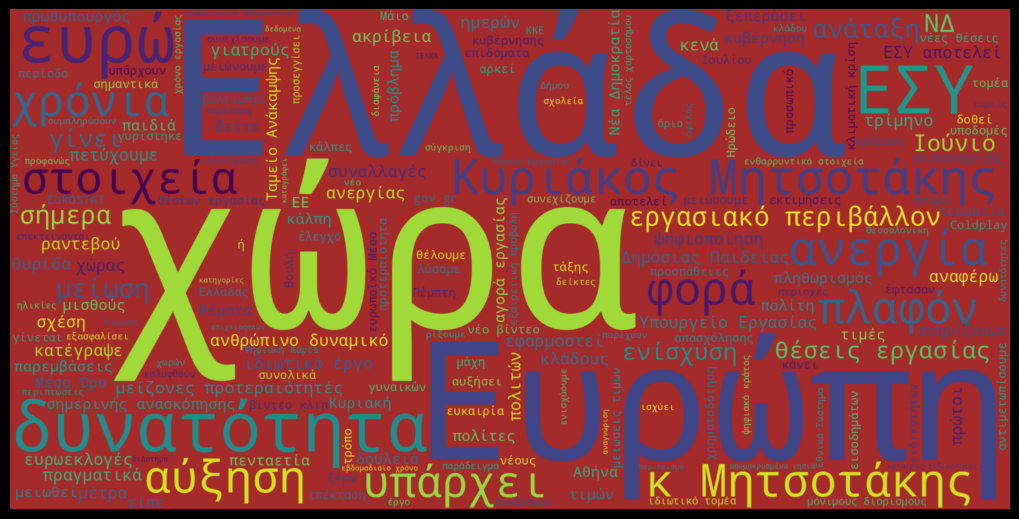

In [49]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'brown'
 ).generate(' '.join(anergiadf[(anergiadf["categories"]=="ΑΝΕΡΓΙΑ") & (anergiadf["day"]==7)]["text"]))
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [50]:
# lemmatization για να φύγουν οι διαφορετικές πτώσεις των ίδιων λέξεων:

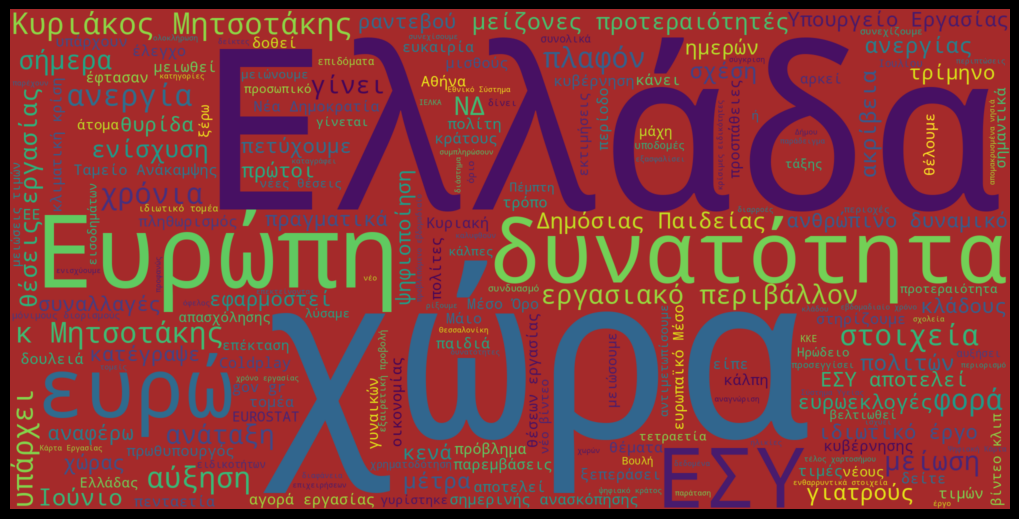

In [51]:

wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'brown'
 ).generate(' '.join(anergiadf[(anergiadf["categories"]=="ΑΝΕΡΓΙΑ") & (anergiadf["day"]==7)]["text"]))
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


# ***emolex για sentiment analysis***

In [52]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"


In [53]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
emolex_df.shape

(13171, 11)

In [55]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [56]:
emolex_df.shape

(13161, 11)

In [57]:
len(anergiadf)

4964

In [58]:
anergiadf.head(1)

,type,source,title,text,categories,sentiment,date,link,datetime,year,month,day
0,web,alithia.gr,Ο Νότης Μηταράκης για τις εκλογές Γαλλίας: Πρέ...,Ο Νότης Μηταράκης για τις εκλογές Γαλλίας: Πρέ...,ΑΝΕΡΓΙΑ,Neutral,2024-07-09,https://www.alithia.gr/politiki/o-notis-mitara...,2024-07-09,2024,7,9


In [59]:
short_anergiadf = anergiadf[['date','text' ]]

In [60]:
short_anergiadf


,date,text
0,2024-07-09,Ο Νότης Μηταράκης για τις εκλογές Γαλλίας: Πρέ...
1,2024-07-09,Αμυράς για επαφές Μητσοτάκη σε Ουάσιγκτον: Δεν...
2,2024-07-09,45°C\nΑμυράς: Δεν έχει κανονιστεί συνάντηση Μη...
3,2024-07-09,Π. Αμυράς για Σύνοδο ΝΑΤΟ: Δεν έχει κανονιστεί...
4,2024-07-09,Πολιτισμός\n5 επιλογές από το ERTflix για τον ...
...,...,...
4959,2024-06-06,"Στο 12,1% αυξήθηκε η ανεργία το πρώτο τρίμηνο...."
4960,2024-06-06,Ο επίμονος πληθωρισμός ανησυχεί τη Fed. Ο επίμ...
4961,2024-06-06,Εκδήλωση για την υποψηφιότητα Μπελέρη και Μελέ...
4962,2024-06-06,Δημοσκόπηση: «Τρομάζει» η γκρίζα ζώνη τρεις ημ...


In [61]:
short_anergiadf['date'] = pd.to_datetime(short_anergiadf['date'], format='%Y-%m-%d')

<ipython-input-61-619abc328586>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_anergiadf['date'] = pd.to_datetime(short_anergiadf['date'], format='%Y-%m-%d')


In [62]:
short_anergiadf['text'] = short_anergiadf['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ", regex=True) #αφαίρεση url από στήλη text

<ipython-input-62-4d3c4e21ab5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_anergiadf['text'] = short_anergiadf['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ", regex=True) #αφαίρεση url από στήλη text


In [63]:
short_anergiadf.head()

,date,text
0,2024-07-09,Ο Νότης Μηταράκης για τις εκλογές Γαλλίας: Πρέ...
1,2024-07-09,Αμυράς για επαφές Μητσοτάκη σε Ουάσιγκτον: Δεν...
2,2024-07-09,45°C\nΑμυράς: Δεν έχει κανονιστεί συνάντηση Μη...
3,2024-07-09,Π. Αμυράς για Σύνοδο ΝΑΤΟ: Δεν έχει κανονιστεί...
4,2024-07-09,Πολιτισμός\n5 επιλογές από το ERTflix για τον ...


In [64]:
short_anergiadf = short_anergiadf.dropna(subset=['text']) # αφαιρώ κενές τιμές στη στήλη text

In [65]:
emolex_df['word'].head(3)


0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [66]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [67]:
matrix = vec.fit_transform(short_anergiadf['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
wordcount_df
     #Η ΚΑΘΕ ΓΡΑΜΜΗ ΑΝΤΙΣΤΟΙΧΕΙ ΣΤΗΓΡΑΜΜΗ ΤΟΥ DF 0-4964 ΚΑΙ Η ΠΑΝΩ ΣΤΗΛΗ Η 13.161 ΕΙΝΑΙ ΟΙ ΛΕΞΕΙΣ ΤΟΥ ΛΕΞΙΚΟΥ

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4962,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
wordcount_df.shape

(4964, 13161)

In [70]:
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
emolex_df[emolex_df.Joy == 1].tail() #ΦΕΡΕ ΜΟΥ ΤΑ ΚΕΙΜΕΝΑ ΟΠΟΥ ΑΝΤΙΣΤΟΙΧΟΥΝ ΛΕΞΕΙΣ ΧΑΡΑΣ

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13038,ανακωχη,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
13039,αληθης,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
13044,ανοιγοκλειω τα βλεφαρα,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
13079,ανυπερβατος,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
13137,καλωσορισατε,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [72]:
emolex_df[emolex_df.Positive == 1]['word'] #ΔΕΙΞΕ ΜΟΥ ΤΑ ΑΡΘΡΑ ΤΑ ΘΕΤΙΚΑ

0                       αφεση
8                        αμην
11                  αυγουστος
15             γαμηλιο ταξιδι
24       διευθυντρια σχολειου
                 ...         
13109        ζωτικης σημασιας
13132              αδιαβροχος
13137            καλωσορισατε
13145      απροσδοκητα ευρημα
13158                νεοτερος
Name: word, Length: 2352, dtype: object

In [73]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [74]:
anticipation_words


15           γαμηλιο ταξιδι
21             γνωστοποιηση
27         δευτερα παρουσια
42               εγγραφειτε
45                 εκκλησια
                ...        
13064         ξεδιπλωνονται
13079           ανυπερβατος
13082        ανεπιβεβαιωτος
13084     ανηφορικος δρομος
13115    ταξιδι στη θαλασσα
Name: word, Length: 915, dtype: object

In [75]:
wordcount_df.tail(1)

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
4963,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
wordcount_df[anticipation_words].tail(1)

,γαμηλιο ταξιδι,γνωστοποιηση,δευτερα παρουσια,εγγραφειτε,εκκλησια,λυρικη σκηνη,μισθος,περιμενετε,προσοχη,σεβασμος,...,ηλιακο ωρολογιο,δυση του ηλιου,ακμαζουσα,ηλεκτρικος διαδρομος,ανοιγοκλειω τα βλεφαρα,ξεδιπλωνονται,ανυπερβατος,ανεπιβεβαιωτος,ανηφορικος δρομος,ταξιδι στη θαλασσα
4963,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
wordcount_df[sadness_words].sum(axis=1)

0        9
1       20
2       17
3       19
4        7
        ..
4959     0
4960     1
4961     9
4962     8
4963     2
Length: 4964, dtype: int64

In [78]:
short_anergiadf.head(5)

,date,text
0,2024-07-09,Ο Νότης Μηταράκης για τις εκλογές Γαλλίας: Πρέ...
1,2024-07-09,Αμυράς για επαφές Μητσοτάκη σε Ουάσιγκτον: Δεν...
2,2024-07-09,45°C\nΑμυράς: Δεν έχει κανονιστεί συνάντηση Μη...
3,2024-07-09,Π. Αμυράς για Σύνοδο ΝΑΤΟ: Δεν έχει κανονιστεί...
4,2024-07-09,Πολιτισμός\n5 επιλογές από το ERTflix για τον ...


In [79]:
#Δημιουργούμε στήλες συναισθημάτων

short_anergiadf['anger'] = wordcount_df[angry_words].sum(axis=1)

short_anergiadf['positive'] = wordcount_df[positive_words].sum(axis=1)

short_anergiadf['joy'] = wordcount_df[joy_words].sum(axis=1)

short_anergiadf['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_anergiadf['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_anergiadf['trust'] = wordcount_df[trust_words].sum(axis=1)

short_anergiadf['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_anergiadf['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_anergiadf['negative'] = wordcount_df[negative_words].sum(axis=1)

short_anergiadf['fear'] = wordcount_df[fear_words].sum(axis=1)

In [80]:
short_anergiadf

,date,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2024-07-09,Ο Νότης Μηταράκης για τις εκλογές Γαλλίας: Πρέ...,9,31,9,14,7,29,14,9,22,8
1,2024-07-09,Αμυράς για επαφές Μητσοτάκη σε Ουάσιγκτον: Δεν...,20,86,27,31,18,64,26,20,57,22
2,2024-07-09,45°C\nΑμυράς: Δεν έχει κανονιστεί συνάντηση Μη...,21,95,31,31,18,72,30,17,55,23
3,2024-07-09,Π. Αμυράς για Σύνοδο ΝΑΤΟ: Δεν έχει κανονιστεί...,22,95,31,31,18,72,30,19,57,23
4,2024-07-09,Πολιτισμός\n5 επιλογές από το ERTflix για τον ...,9,31,12,10,4,16,14,7,23,10
...,...,...,...,...,...,...,...,...,...,...,...,...
4959,2024-06-06,"Στο 12,1% αυξήθηκε η ανεργία το πρώτο τρίμηνο....",0,1,1,0,1,9,1,0,2,0
4960,2024-06-06,Ο επίμονος πληθωρισμός ανησυχεί τη Fed. Ο επίμ...,2,13,0,0,1,4,2,1,13,7
4961,2024-06-06,Εκδήλωση για την υποψηφιότητα Μπελέρη και Μελέ...,12,21,13,1,12,12,9,9,15,1
4962,2024-06-06,Δημοσκόπηση: «Τρομάζει» η γκρίζα ζώνη τρεις ημ...,11,15,6,6,7,8,5,8,14,13


# #Κάνουμε index τη στήλη date ώστε να χρησιμοποιήσουμε το resample

In [81]:
short_anergiadf.reset_index(inplace=True)
short_anergiadf.set_index('date', inplace=True)
short_anergiadf


,index,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
date,,,,,,,,,,,,
2024-07-09,0,Ο Νότης Μηταράκης για τις εκλογές Γαλλίας: Πρέ...,9,31,9,14,7,29,14,9,22,8
2024-07-09,1,Αμυράς για επαφές Μητσοτάκη σε Ουάσιγκτον: Δεν...,20,86,27,31,18,64,26,20,57,22
2024-07-09,2,45°C\nΑμυράς: Δεν έχει κανονιστεί συνάντηση Μη...,21,95,31,31,18,72,30,17,55,23
2024-07-09,3,Π. Αμυράς για Σύνοδο ΝΑΤΟ: Δεν έχει κανονιστεί...,22,95,31,31,18,72,30,19,57,23
2024-07-09,4,Πολιτισμός\n5 επιλογές από το ERTflix για τον ...,9,31,12,10,4,16,14,7,23,10
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-06,4959,"Στο 12,1% αυξήθηκε η ανεργία το πρώτο τρίμηνο....",0,1,1,0,1,9,1,0,2,0
2024-06-06,4960,Ο επίμονος πληθωρισμός ανησυχεί τη Fed. Ο επίμ...,2,13,0,0,1,4,2,1,13,7
2024-06-06,4961,Εκδήλωση για την υποψηφιότητα Μπελέρη και Μελέ...,12,21,13,1,12,12,9,9,15,1


# **`Γραφήματα ομαδοποιώντας μέσω του resample`**

<Axes: xlabel='date'>

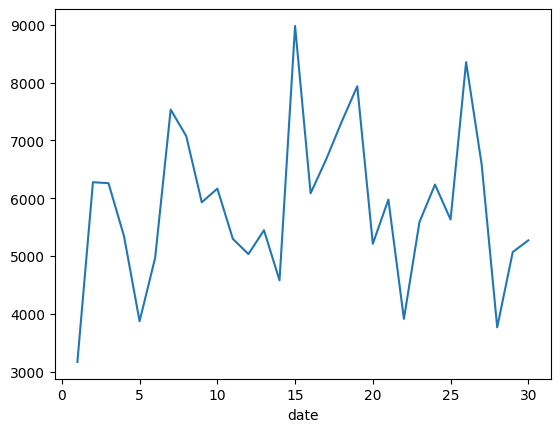

In [82]:
#Μετράμε τον μ.ο. του αριθμού των χαρακτηρων (των λεξεων) ανά ημέρα
short_anergiadf['text'].str.len().groupby(by=short_anergiadf.index.day).mean().plot()

<Axes: ylabel='date'>

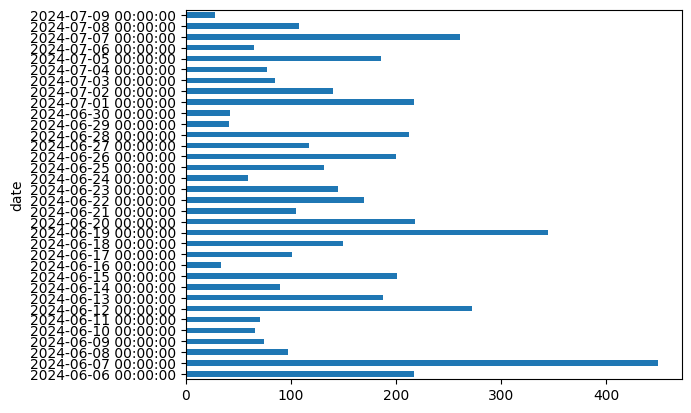

In [83]:
#Μετράμε το πλήθος των άρθρων ανά ημέρα
short_anergiadf['text'].resample('D').count().plot(kind='barh')

<Axes: xlabel='date'>

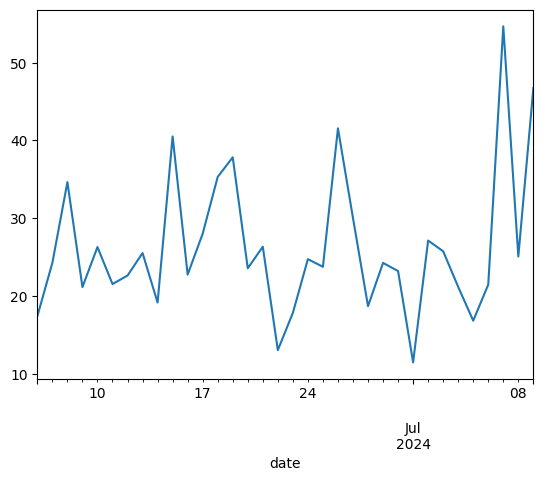

In [84]:
#Μετράμε τη θετικότητα/αρνητικότητα και το συναισθηματικό πρόσιμο των άρθρων ανά ημέρα
short_anergiadf['positive'].resample('D').mean().plot()

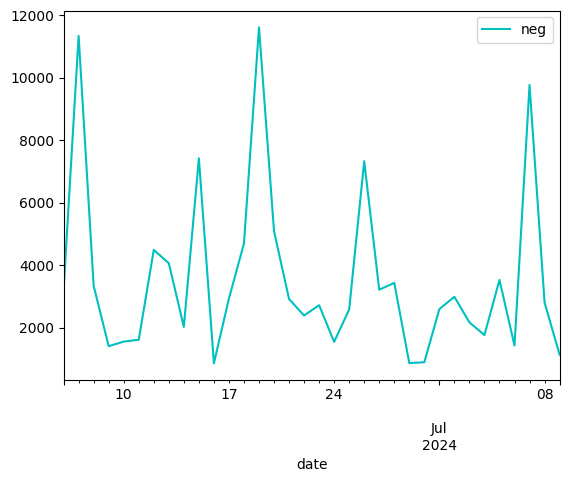

In [85]:
#Μετράμε τη θετικότητα/αρνητικότητα και το συναισθηματικό πρόσιμο των άρθρων ανά ημέρα
short_anergiadf['negative'].resample('D').sum().plot(color = 'c',label = 'neg').legend()

<Axes: xlabel='date'>

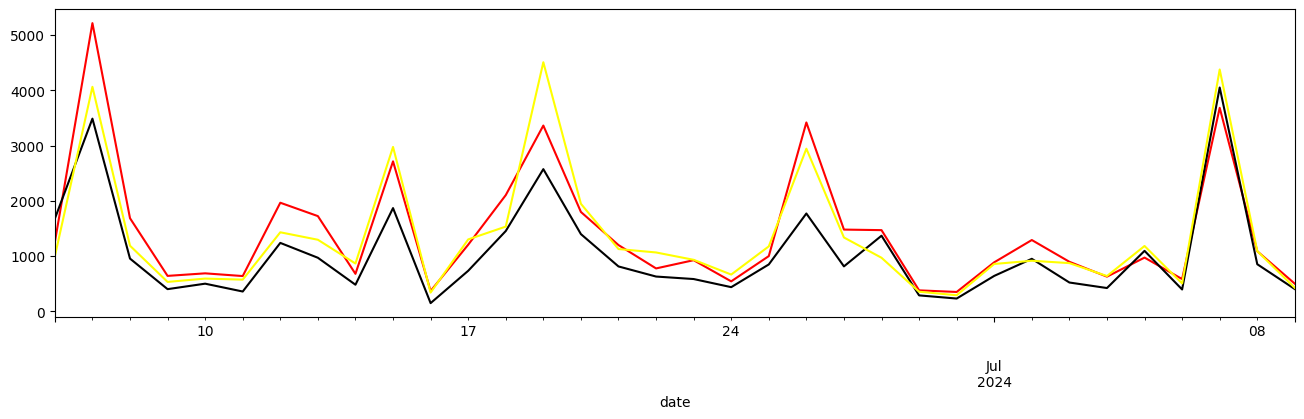

In [86]:
#Μπορούμε να εμφανίσουμε πολλά linecharts στο ίδιο γράφημα
ax = short_anergiadf['anger'].resample('D').sum().plot(figsize=(16,4), color = 'red')
short_anergiadf['joy'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'black')
short_anergiadf['sadness'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'yellow')

In [87]:
import matplotlib.pyplot as plt
plt.style.use('default')
#plt.style.use('classic')
#plt.style.use('ggplot')
plt.style.use('Solarize_Light2')
#plt.style.use('seaborn-v0_8-bright')

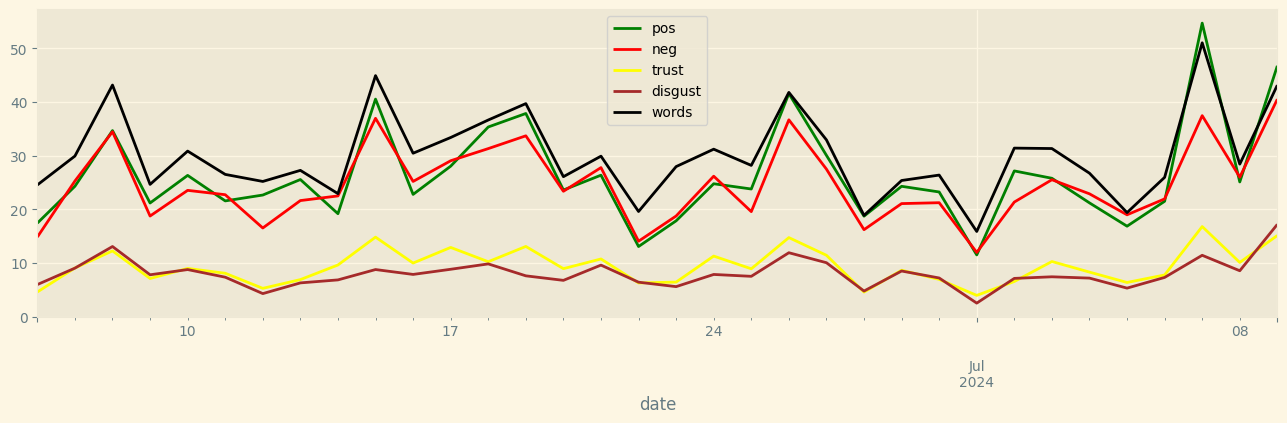

In [88]:
ax = short_anergiadf['positive'].resample('D').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_anergiadf['negative'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_anergiadf['sadness'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'yellow').legend()
short_anergiadf['disgust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_anergiadf['text'].str.len().resample('D').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()

<Axes: xlabel='date'>

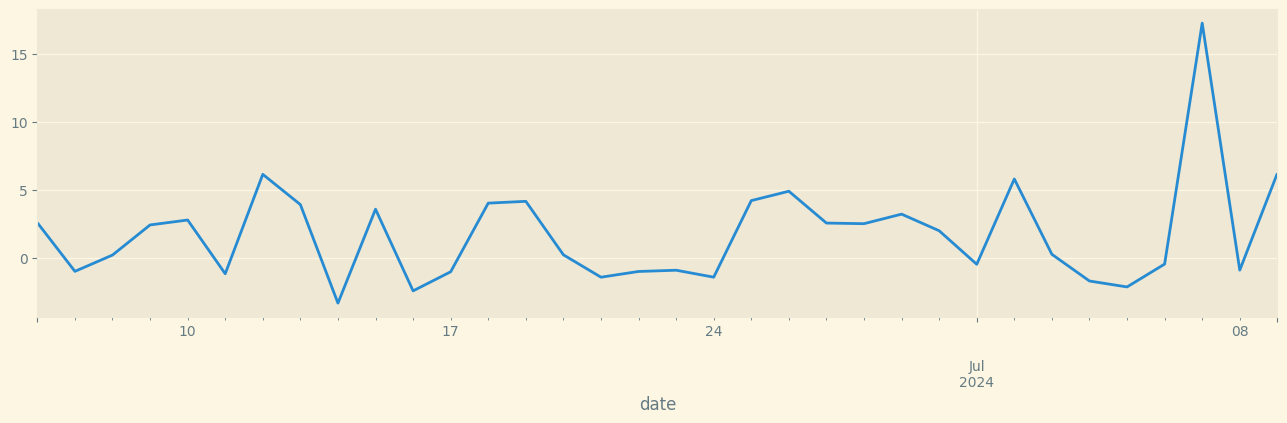

In [89]:
#φτιαχνω ενα γραφημα οπου  αφαιρω το θετικο απο το αρνητικο για να βρω την διαφορα τους και το εφανιζω σε γραφημα
short_anergiadf['pos/neg'] = short_anergiadf['positive'] - short_anergiadf['negative']
short_anergiadf['pos/neg'].resample('D').mean().plot(figsize=(16,4))


In [90]:
#plt.style.use('grayscale')
plt.style.use('seaborn-v0_8-darkgrid')
#εδω το μετατρεπω σε ποσοστο προσθετω το ποσιτιβε με το νεγατιωε και το πολλαπλασιαζω επι 100 και μετα το διαιρω σαν να κανω μεθοδο των τριων

<Axes: xlabel='date'>

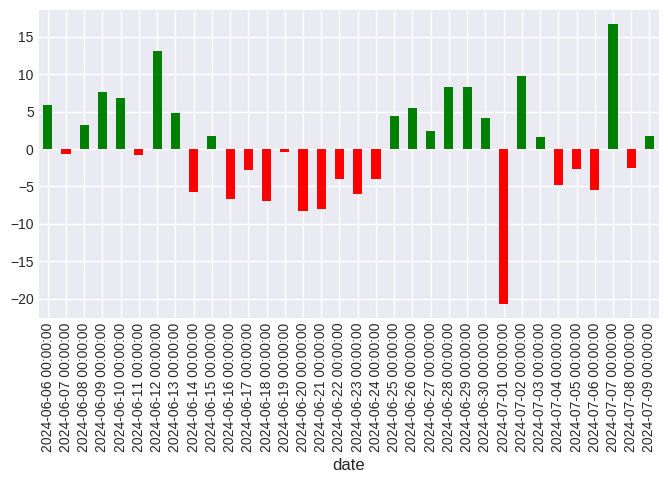

In [91]:
#εδω το μετατρεπω σε ποσοστο προσθετω το positive με το negative και το πολλαπλασιαζω επι 100 και μετα το διαιρω σαν να κανω μεθοδο των τριων
short_anergiadf['(-)αρνητικότητα | θετικότητα(+)'] = short_anergiadf.positive*100//short_anergiadf[['positive','negative']].sum(
        axis=1) - short_anergiadf.negative*100//short_anergiadf[['positive','negative']].sum(axis=1)

short_anergiadf['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean().plot(kind='bar',
                                                                               color=(short_anergiadf['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))


In [92]:
short_anergiadf[(short_anergiadf['(-)αρνητικότητα | θετικότητα(+)'] == short_anergiadf['(-)αρνητικότητα | θετικότητα(+)'].max()) |
                  (short_anergiadf['(-)αρνητικότητα | θετικότητα(+)'] == short_anergiadf['(-)αρνητικότητα | θετικότητα(+)'].min())
                  ][['index', 'positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

,index,positive,negative,(-)αρνητικότητα | θετικότητα(+)
date,,,,
2024-07-07,394,0,1,-100.0
2024-07-05,468,12,0,100.0
2024-07-05,533,15,0,100.0
2024-07-05,554,12,0,100.0
2024-07-05,559,12,0,100.0
2024-07-05,607,13,0,100.0
2024-07-02,845,0,1,-100.0
2024-07-02,927,5,0,100.0
2024-07-01,956,0,4,-100.0
